<a href="https://colab.research.google.com/github/pateljay7018/CE888-7-SP-D.S.-and-decision-making-/blob/main/Lab-2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [46]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as st


In [47]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/pateljay7018/CE888-7-SP-D.S.-and-decision-making-/main/Lab-2/customers.csv')
data = df.values.T[1]

In [48]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  sam=np.random.choice(x, size=(n_bootstraps, sample_size), replace=True, p=None)
  data_mean=np.mean(sam)
  av= np.mean(sam, axis=1)
  per=np.percentile(av, [(100-95)/2,100-((100-95)/2)], axis=None, out=None) 
  lower=per[0]
  upper=per[len(per)-1]
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

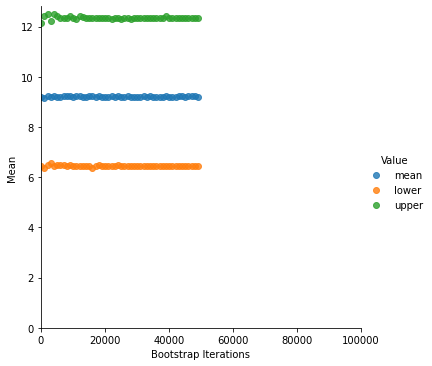

In [49]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [50]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  sam=np.random.choice(sample, size=(n_bootstraps, sample_size), replace=True, p=None)
  data_mean=np.mean(sam)            #mean
  av= np.mean(sam, axis=1)          #mean

  #data_std= np.std(sam)            #standard deviation
  #std_row= np.std(sam, axis=1)     #standard deviation

  per=np.percentile(av, [(100-ci)/2,100-((100-ci)/2)], axis=None, out=None) # mean
  #per=np.percentile(std_row, [(100-ci)/2,100-((100-ci)/2)], axis=None, out=None) #standard deviation
  
  lower=per[0]
  upper=per[len(per)-1]

  print(per)

  return data_mean, lower, upper      #for standard deviation return data_std while you use mean to return data_mean

1
[9.57142857 9.57142857]
1001
[ 6.35714286 12.42857143]
2001
[ 6.35714286 12.42857143]
3001
[ 6.57142857 12.21428571]
4001
[ 6.5        12.28571429]
5001
[ 6.42857143 12.35714286]
6001
[ 6.57142857 12.35714286]
7001
[ 6.5        12.28571429]
8001
[ 6.35714286 12.35714286]
9001
[ 6.42857143 12.28571429]
10001
[ 6.5        12.42857143]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

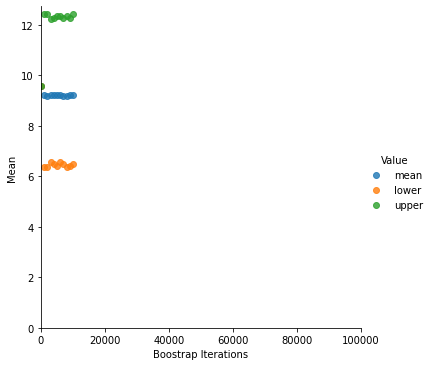

In [51]:
boots = []
for i in range(1, 10002, 1000):
    print(i)
    boot = bootstrap_mean_ci(data, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [52]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/pateljay7018/CE888-7-SP-D.S.-and-decision-making-/main/Lab-2/vehicles.csv')
data_f1 = df.values.T[0] #new data 
data_f2=data_f2t[:79] #old data

In [54]:
boots = []
for i in range(1, 10002, 1000):
    print(i)
    boot = bootstrap_mean_ci(data_f2, data_f2.shape[0], i, 99)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

1
[29.60759494 29.60759494]
1001
[28.82278481 32.29113924]
2001
[28.62025316 32.17721519]
3001
[28.81012658 32.15189873]
4001
[28.82278481 32.30379747]
5001
[28.75949367 32.24050633]
6001
[28.70886076 32.20253165]
7001
[28.79746835 32.21518987]
8001
[28.69620253 32.21518987]
9001
[28.79746835 32.2278481 ]
10001
[28.6835443  32.25316456]


In [55]:
x=[]
for i in range(249):
  x.append(i)

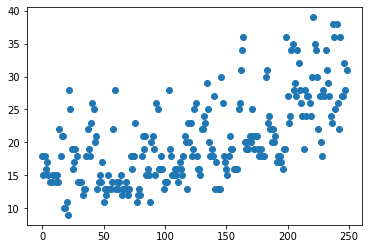

In [56]:
import matplotlib.pyplot as plt
plt.scatter(x, data_f1)
plt.show()

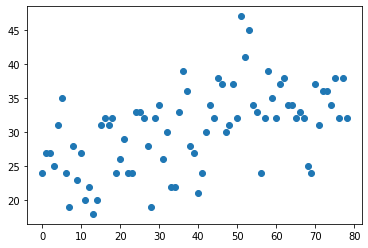

In [57]:
plt.scatter(x, data_f2t)
plt.show()

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [58]:
# <---INSERT YOUR CODE HERE--->
mf1=np.mean(data_f1)
mf2=np.mean(data_f2)
bf1=bootstrap_mean_ci(data_f1, data_f1.shape[0], 100, 95)
bf2=bootstrap_mean_ci(data_f2, data_f2.shape[0], 100, 95)

[19.51767068 20.75562249]
[29.27658228 31.87531646]


In [59]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    c=0
    to=np.mean(sample2)-np.mean(sample1)
    # print(np.mean(sample1))
    # print(np.mean(sample2))
    # print(to)
    concat = np.concatenate((sample1, sample2))
    for i in range(n_permutations):
      perm = np.random.permutation(concat)
      psample1 = perm[:int(len(sample1))]
      psample2 = perm[int(len(sample1)):]
      tp=np.mean(psample2)-np.mean(psample1)
      # print(tp)
      if tp>to:
        c+=1
    pvalue=c/n_permutations
    # print(pvalue)
    return pvalue

In [60]:
p=permut_test(data_f1,data_f2,30000)

In [61]:
#voting_data.py 
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [62]:
print(len(dem_share_PA))
print(len(dem_share_OH))
print(np.mean(dem_share_PA))
print(np.mean(dem_share_OH))

67
88
45.476417910447765
44.31818181818182


In [63]:
boots = [] #Ohio
for i in range(1, 20002 , 1000):
    print(i)
    boot = bootstrap_mean_ci(np.array(dem_share_OH), np.array(dem_share_OH).shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

1
[43.72022727 43.72022727]
1001
[42.32738636 46.20386364]
2001
[42.29647727 46.33613636]
3001
[42.27034091 46.39170455]
4001
[42.29306818 46.30636364]
5001
[42.25215909 46.34090909]
6001
[42.28193182 46.38488636]
7001
[42.26988636 46.37965909]
8001
[42.25602273 46.3825    ]
9001
[42.20590909 46.36681818]
10001
[42.29659091 46.36136364]
11001
[42.30056818 46.33761364]
12001
[42.26056818 46.32261364]
13001
[42.22306818 46.38181818]
14001
[42.26022727 46.35704545]
15001
[42.20727273 46.385     ]
16001
[42.28272727 46.34920455]
17001
[42.24113636 46.35886364]
18001
[42.25784091 46.35818182]
19001
[42.31681818 46.38863636]
20001
[42.23886364 46.36238636]


In [64]:
boots = [] #Pennsylvania
for i in range(1, 20002 , 1000):
    print(i)
    boot = bootstrap_mean_ci(np.array(dem_share_PA), np.array(dem_share_PA).shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

1
[45.04074627 45.04074627]
1001
[43.22164179 48.00552239]
2001
[43.19074627 47.74089552]
3001
[43.19014925 47.99238806]
4001
[43.26985075 47.82238806]
5001
[43.24432836 47.8241791 ]
6001
[43.20164179 47.86925373]
7001
[43.21253731 47.89701493]
8001
[43.13134328 47.84253731]
9001
[43.23149254 47.77746269]
10001
[43.24432836 47.88358209]
11001
[43.21432836 47.86746269]
12001
[43.20358209 47.91895522]
13001
[43.21970149 47.85179104]
14001
[43.16716418 47.88552239]
15001
[43.21731343 47.91089552]
16001
[43.2141791  47.88104478]
17001
[43.19656716 47.84820896]
18001
[43.19656716 47.85253731]
19001
[43.18268657 47.84313433]
20001
[43.18164179 47.87880597]


In [65]:
print(permut_test(dem_share_PA,dem_share_OH,10000))

0.758
